# Nim's Offensive Applications

After looking at Nim malware from the defensive perspective, let's examine the other side of the coin.

Nim is a fantastic malware development language for a few reasons:

- Elegent, easy access to the Win API via the winim library (we saw this with the ShellExecute binary example).
- Nim compiled binaries are compiled directly to native C/C++ code. Your malware binaries do not rely on the existence of an interpreter or virtual machine to execute.
- Nim binaries are tiny compared to other cross-compileable, statically-linked languages like Go and Rust.
- Winim can also call the Component Object Model (COM) directly which allows for flexibility of post-exploitation execution.
- Easy generation of Windows DLLs.

... and a whole lot more.

## OffensiveNim
aka "The Sacred Texts"

[OffensiveNim](https://github.com/byt3bl33d3r/OffensiveNim) is Marcello Salvati's (aka byt3bl33d3r) research repository for the offensive application of Nim. No talk on Nim malware would be complete without mentioning his incredible work.

This repository has several powerful proof of concepts for a wide range of offensive activities, from classic [CreateRemoteThread shellcode injection](https://github.com/byt3bl33d3r/OffensiveNim/blob/master/src/shellcode_bin.nim) to [minidumping LSASS](https://github.com/byt3bl33d3r/OffensiveNim/blob/master/src/minidump_bin.nim) to [keylogging](https://github.com/byt3bl33d3r/OffensiveNim/blob/master/src/keylogger_bin.nim) to [things so dope I don't even understand what they are doing](https://github.com/byt3bl33d3r/OffensiveNim/blob/master/src/taskbar_ewmi_bin.nim).

## Example: CreateRemoteThread Shellcode Injection
Let's examine a simple POC from this repository to see an example of how Nim's chartacteristics lend itself to malware development.

In [ ]:
!cat ../samples/src/createremotethread/createremotethread.nim

---

Now, let's look at another simple POC for a malicious function: **DNS exfiltration**.

Using the following Nim code, I am able to read in the bytes of `cosmo.jpg`, encode them in URL safe base64, and make a series of DNS TXT record lookups to a specified name server:

In [ ]:
!cat ../samples/src/DNSExfilCosmo/DNSExfilCosmo.nim

## Demonstration of DNS Exfiltrator

This DNS exrfiltrator has a "dead man's switch" to trigger exfiltration. The "lub dub" request goes out to hxxp://hey.youup[.]local and assesses the response code:

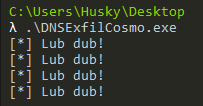

When this reponse code is no longer 200 OK...

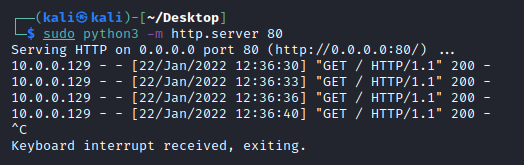

... the exfiltration occurs. We can see the TXT records for the subdomains of cosmosfurbootsemporium, which correspond to the URL safe bytes of the picture:

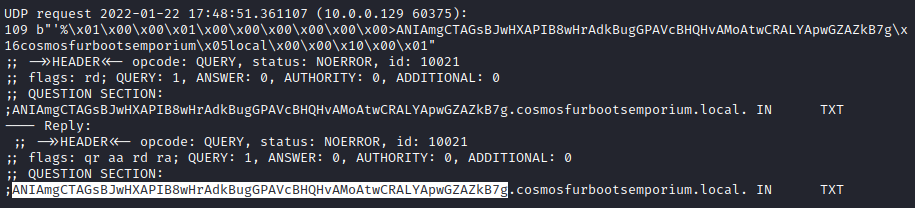


### Other examples of Nim malware I've dev'd (by direction or otherwise)
(no source in this repo for these 😉)
- Symmetric key ransomware emulator
- Asymmetric key ransomware emulator
- DLL blocking dropper. Blocks and DLLs from entering a process if they are not Microsoft code signed.
- DLL blocking dropper. Blocks any DLLs from entering a process if they are not from the Microsoft Store.
- Self-injector beacon dropper/spawner
- COM execution for download/execute of a beacon
- Simple unmanaged PowerShell loader (good POC from Marcello/[Alh4zr3d](https://www.twitch.tv/alh4zr3d) available [here](https://github.com/byt3bl33d3r/OffensiveNim/blob/master/src/execute_powershell_bin.nim))
- AWS key file smash and grab
- A few varieties of DLLs used for DLL hijacking/sideloading

---
## [Previous: Malware Analysis](MalwareAnalysis.ipynb) ||--0--|| [Next: The Night Taggart And I Reverse Nimble.exe](NimbleAVExcursion.ipynb)